In [34]:
from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80

In [35]:
path = "example.txt"

In [36]:
import json
with open(path) as f:
    records = [json.loads(line) for line in f]

In [37]:
time_zones = [rec["tz"] for rec in records]

KeyError: 'tz'

In [ ]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [38]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts


In [39]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [40]:
counts = get_counts(time_zones)
counts["America/New_York"]
len(time_zones)

3440

In [41]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [42]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [43]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [44]:
frame = pd.DataFrame(records)

In [45]:
frame.info()
frame["tz"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

In [46]:
tz_counts = frame["tz"].value_counts()
tz_counts.head()

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

In [47]:
clean_tz = frame["tz"].fillna("Missing")
clean_tz[clean_tz == ""] = "Unknown"
tz_counts = clean_tz.value_counts()
tz_counts.head()

tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

In [48]:
plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Axes: ylabel='tz'>

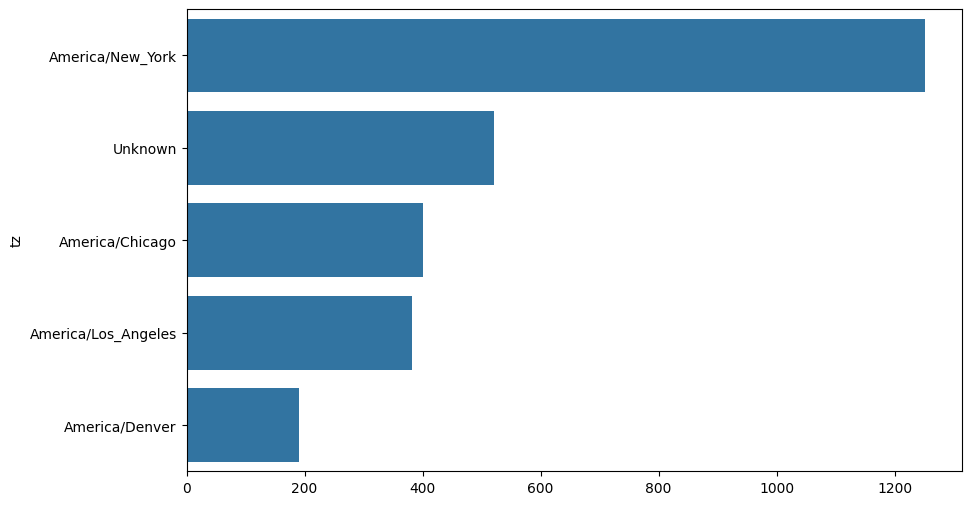

In [49]:
import seaborn as sns
subset = tz_counts.head()
sns.barplot(y=subset.index, x=subset.to_numpy())

In [50]:
frame["a"][1]
frame["a"][50]
frame["a"][51][:50]  # long line

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [51]:
results = pd.Series([x.split()[0] for x in frame["a"].dropna()])
results.head(5)
results.value_counts().head(8)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Name: count, dtype: int64

In [52]:
cframe = frame[frame["a"].notna()].copy()

In [53]:
cframe["os"] = np.where(cframe["a"].str.contains("Windows"),
                        "Windows", "Not Windows")
cframe["os"].head(5)

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [54]:
by_tz_os = cframe.groupby(["tz", "os"])

In [55]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [56]:
indexer = agg_counts.sum("columns").argsort()
indexer.values[:10]

array([24, 20, 21, 92, 87, 53, 54, 57, 26, 55], dtype=int64)

In [57]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [58]:
agg_counts.sum(axis="columns").nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [59]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='total', ylabel='tz'>

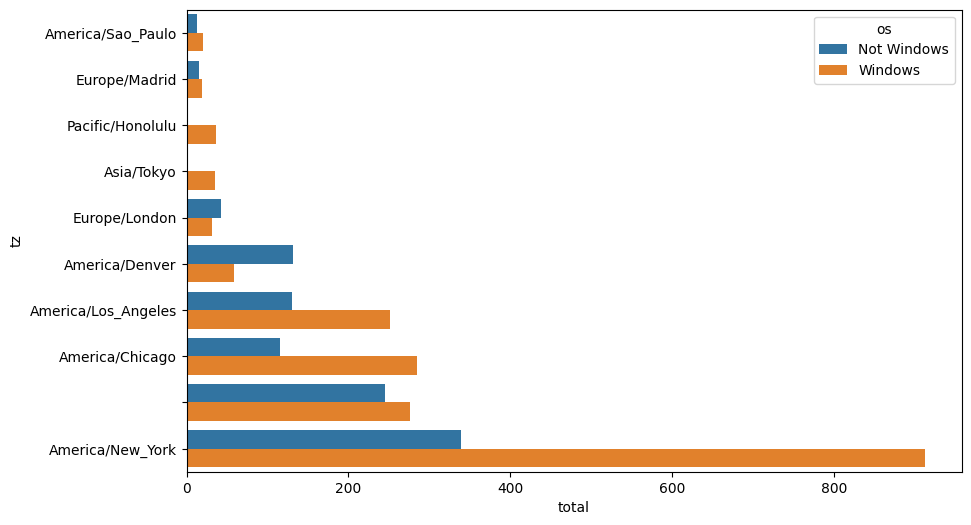

In [60]:
count_subset = count_subset.stack()
count_subset.name = "total"
count_subset = count_subset.reset_index()
count_subset.head(10)
sns.barplot(x="total", y="tz", hue="os",  data=count_subset)

In [61]:
def norm_total(group):
    group["normed_total"] = group["total"] / group["total"].sum()
    return group

results = count_subset.groupby("tz").apply(norm_total)

C:\Users\phanv\AppData\Local\Temp\ipykernel_7720\1595230757.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = count_subset.groupby("tz").apply(norm_total)


In [62]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='normed_total', ylabel='tz'>

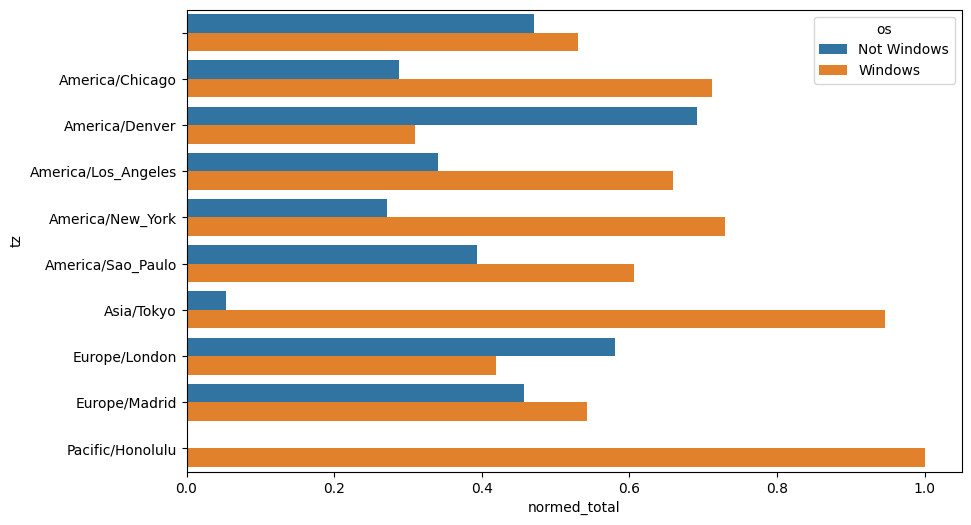

In [63]:
sns.barplot(x="normed_total", y="tz", hue="os",  data=results)

In [64]:
g = count_subset.groupby("tz")
results2 = count_subset["total"] / g["total"].transform("sum")